# Lecture 04 (Sept 12th 2019)

## Note:

Students with Windows computers who have been having issues should update their conda as the previous version had some issues

Open a **Anaconda Powershell Prompt**

Run: `conda update -n base conda`

### The packages needed for todays lecture:

+ jupyter
+ matplotlib
+ numpy
+ pandas
+ seaborn

## Advanced Pandas

### The Journey so Far

In the previous lecture we learned how to load data into a dataframe and then extract specific subsets of data from the dataframe. We also created some plots using matplotlib.

Today we will look at more advanced functionality:
  + Creating new rows/columns
    + Using new data
    + Using data in existing columns
  + Grouping data
  + Aggregating data
  + Applying functions accross rows/columns
  + Restructuring the table
    + Converting a wide format table into a long format
    + Converting a long format table into a wide format
  + Different types of plots in Seaborn
  + Adjusting Color Pallets
  + Adjusting figure size
    + Using `plt.figure()` for each plot
    + Using seaborn rc
  + Changing plot aesthetics
    
Lets start by importing pandas

```python
import pandas as pd
```

In [ ]:
import pandas as pd

### Adding New Data


```python
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df
```

##### Adding rows:
+ Using append\(\)
    + The rows must be represented as a dictionary
      + key = column
      + value is the value
    + The ignore index flag must be set
    + This operation does not alter the original dataframe

```python
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df = df.append({'a': 1, 'b':2}, ignore_index=True)
df
```

+ Using loc
    + We can add a new row using `df.loc["row_name"]` or `df.loc[index]`
    
```python
# this will add a row containing zeros
df.loc[len(df)] = 0
# this will add a row with a=5 and b=6
df.loc[len(df)] = [5, 6]
# The number of elements in the array need to match the number of columns
# df.loc[len(df)] = [1, 2, 3]
```
  

##### Adding columns:
+ Using indexing[]
    + Updates the existing DataFrame
    + Either it must be assigned to a list with the same number of elements as there are rows
    + Or a constant can be assigned

```python
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df["c"] = [1,2,3,4]
df["d"] = 5
df
```

+ Using assign()
    + Creates a new DataFrame
    + A column can be assigned:
      + A constant
      + A value for each row
      + A function that calculates the rows value using another row
    
```python
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df = df.assign(c=5)
df = df.assign(d=[1,2,3,4])
df = df.assign(e=lambda x: x['d']**2)
df
```

+ Using insert()
    + Is an in place operation
    + Requires three positional arguments:
      + loc: the index of where to insert the column (0 <= index <= len(df.columns))
      + column: the column name
      + value: the values to insert. A constant or a list with len(df)

```python    
df = pd.DataFrame({'a': [0,0,0,0], 'b': [1, 1, 1 ,1]})
df.insert(loc=len(df.columns), column='c', value=5)
df.insert(loc=len(df.columns), column='d', value=[1, 2, 3, 4])
df
```

#### Adding rows / columns using existing data

We saw an example of this when adding a column using append.

There are many methods of achieving the same result.

##### The `agg()` function

The `agg()` function will aggregate either rows or columns of the DataFrame.

The agg function returns a new DataFrame, so the results need to be saved either into a new dataframe, or into an existing dataframe.

+ Adding new columns
  + columns are added by using `axis=1`
  + You can use a single function to add a single column
  + You can also use a list of functions to add multiple columns
  + There are built in functions that can be called by passing a string
    + sum
    + mean
    + median
    + std
    + max
    + min
    + There may be more, I could not find a definitive list
  
```python
import numpy as np

df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df["sum"] = df.agg(sum, axis=0)
df[['std', 'sum', 'mean', 'max', 'min']] = df.agg([np.std, 'sum', 'mean', 'max', 'min'], axis=1)
df
```

+ Adding new rows
  + rows are added by using the `axis=0` argument. If no axis is defined, this is the default
  + Asside from the axis everything works exactly the same
  + Use `.append()` or `.loc` to add a single row
  + Use `.append()` for adding multiple rows
  
```python
df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df.loc['total'] = df.agg(sum, axis=0)
df = df.append(df.agg(['min', 'max', 'mean']))
df
```

##### Using `apply()`

Apply and agg are similar, apply can be applied to single values, while agg always acts on a whole row or column


```python
df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df.apply(np.sqrt)
```

##### Normalizing a column

There are many methods that can be applied to normalize a column.

This example uses min-max normalization which will normalize the values to lie between 0 and 1

```python
df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df['b'] = (df['b'] - df['b'].min()) / (df['b'].max() - df['b'].min())
df
```

#### Modifying Rows / Columns

Rows and columns can be modified by overwriting their values using [] indexing or .loc indexing

```python
df = pd.DataFrame({'a': [1,1,1,1], 'b': [1, 2, 3 ,4]})
df['a'] = df['a'] + 5
df.loc[df['b'] % 2 == 0] = df.loc[df['b'] % 2 == 0] + 1
df
```

### Grouping Data

Seaborn comes with some built in dataframes.
The flights dataset is a nice example for grouping as it is easy to understand and manipulate.
This dataset gives the number of passengers who flew between 1949 and 1960. When loading the dataset no information is given regarding the order of the number of passengers, but this is not important for our purposes.

```python
import seaborn as sns
df = sns.load_dataset('flights')
df.tail()
```


In [ ]:
import seaborn as sns
df = sns.load_dataset('flights')
df.tail()

#### Using groupby
###### Finding out how many passengers flew each year

On its own, the groupby function does not actually do anything. It needs to be used in conjunction with some form of agregation.

```python
df.groupby('year')
# > <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1164e32e8>
```

To answer the above question we would like to know the total. To calculate this we can use the `.sum()` function.

The dataframe will first be grouped into years, and then each group will be summed.
```python
df.groupby('year').sum()
```

In [ ]:
df.groupby('year').sum()

To get a better idea of what is happening we can use the `agg` function.
This function will apply a function that reduces the data to a single value.

To help visualize the date we can use the `list` function, which will reduce all the values into a single list

```python
df.groupby('year').agg(list)
```

This functionality is the same as using `.agg()` on a dataframe. You can use any of the predefined functions that we discussed earlier, multiple agrigation calculations can be applied at the same time.

```python
df.groupby('year').agg(['sum', 'mean'])
```

###### Finding the average number of passengers per month

We can make use of the groupby and mean functions to achieve this.

Lets start simple
```python
df.groupby('month').mean()
```

What is wrong with this output?

To fix this we need to first subset our data and remove columns we would not like to agregate.
```python
df[["month", "passengers"]].groupby('month').mean()
```

#### What if we wanted to see the median number of passengers by month in 5 year incriments?

This is more complicated, we would first need to add a new column defining which 5 year period that year falls into, then we can apply a groupby followed by a median function.

```python
min_year = df['year'].min()
df['5_year_period'] = df.apply(lambda x: (x['year'] - min_year) // 5, axis=1)
# This could also be achieved without the apply()
# df['5_year_period'] = (df['year'] - df['year'].min()) // 5
df
```

Lets break that down
+ `df['year'].min()`
  + This returns the earliest year
  + If we subtract this from each year it will normalize the years to start from 0
+ `df.apply()` will apply a function to the dataframe
  + This happens either: 
    + down columns (axis=0)
    + across rows (axis=1) 
  + The result of apply returns a new dataframe and does not change the original
+ `lambda x:`
  + `lambda` functions are nameless functions
  + `x` is the variable that is passed to the function
  + This is neater than defining a function as it can be defined inline
    + If the function is complicated it is better to define a function
+ `(x['year'] - min_year) // 5`
  + `x[year]` is the year in the current row being evaluated
  + `//5` is integer/floor division, the remainder is removed and an integer is returned
  + This results in 0 for the first 5 years, 1 for the next 5 years and so on

Now we can drop the year column and groupby the month and the period. Then we can take the median.

```python
df.drop(columns=['year']).groupby(['month', '5_year_period']).median()
```

##### An alternate approach

0, 1, 2 are not very informative columns, instead we should keep this in years.

```python
df['5_year_period'] = df.apply(lambda x: '{}-{}'.format((x['year'] // 5) * 5, ((x['year'] + 5) // 5) * 5), axis=1)
df
```

In [ ]:
df_median = df.drop(columns='year').groupby(['month', '5_year_period']).median()
df_median.head()

We now have a long format table. The reason that this table is in long format is that we have a single passenger count per row in the dataframe. Alternatively, in wide format, each month would have three values. One for each of the 5 year windows.

Converting from long format to wide format requires the `pivot()` function.

Before we can pivot the table, we need to reset the index using `reset_index()`. This will remove the groupings created by `groupby()`

```python
df_median = df_median.reset_index()
df_median.head()
```

In [ ]:
df_median = df_median.reset_index()
df_median.head()

The pivot function has three arguments
+ index : string or object, optional
  + Column to use to make new frame’s index. If None, uses existing index.

+ columns : string or object
  + Column to use to make new frame’s columns.

+ values : string, object or a list of the previous, optional
  + Column(s) to use for populating new frame’s values. If not specified, all remaining columns will be used and the result will have hierarchically indexed columns.

In our case, the **month** will be the index, the values will come from **passengers** and the columns are defined by **5_year_period**.

```python
df_wide = df_median.pivot(index='month', columns='5_year_period', values='passengers')
df_wide.head()
```

In [ ]:
df_wide = df_median.pivot(index='month', columns='5_year_period', values='passengers')
df_wide.head()

The header of the table is multidimensional after the pivot operation. To revert the table back to a regular dataframe the index needs to be reset. Another issue is that the index axis is renamed during this process so that needs to be reset as well.

```python
df_wide = df_wide.reset_index().rename_axis(None, axis=1)
df_wide.head()
```


#### Melting a DataFrame

Melt is the reverse operation of pivot. Pivot converts a long format dataframe to a wide format and melt converts a wide format dataframe to a long format.

The arguments required by `.melt()` taken from the documentation
+ id_vars : tuple, list, or ndarray, optional
  + Column(s) to use as identifier variables.

+ value_vars : tuple, list, or ndarray, optional
  + Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.

+ var_name : scalar
  + Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.

+ value_name : scalar, default ‘value’
  + Name to use for the ‘value’ column.

+ col_level : int or string, optional
  + If columns are a MultiIndex then use this level to melt.
  
```python
df_wide.melt(id_vars=['month'], var_name='5_year_period', value_name='passengers').head()
```

## Seaborn

Seaborn is statistical plotting library that works well with pandas, its all about shaping your data correctly.

Here is the API which lists all the plots:
https://seaborn.pydata.org/api.html

Here is a gallery which gives some examples of different plots:
https://seaborn.pydata.org/examples/index.html

They have good tutorials covering most aspects of using the package:
https://seaborn.pydata.org/tutorial.html



#### Importing Seaborn

The package needs to be installed into the python environment
```shell
conda install seaborn
```

Once the package has been installed it can be imported
```python
import seaborn as sns
```

In [ ]:
import seaborn as sns

##### Seaborn plot types

In Seaborns API the plots are separated by category.

We will go over some of the plots from different categories

### Categorical Plots

Choosing the right plot for the job.
This takes practice and taking the time to think about what you want your plots to convey.

#### Count Plots / Bar plots
+ count plot: https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
+ bar plot: https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

With the flights dataset we already have the counts, so we can use a barplot

```python
sns.barplot(x = '5_year_period', y='passengers', data=df_median)
```

##### Box Plots

```python
sns.boxplot(y='passengers', x='month', data=df)
```

##### Boxen Plots (Box plots for large datasets)

```python
sns.boxenplot(y='passengers', x='month', data=df)
```

##### SwarmPlot

This is a categorical scatter plot, but the points are adjusted so that they do not overlap
```python
sns.swarmplot(y='passengers', x='month', data=df)
```

### Distribution plots

##### Dist plot

```python
sns.distplot(df['passengers'])
```

##### Color Pallets

Color is important when you are creating plots. Often the default colors are not the best choice.

In [ ]:
sns.barplot(x = '5_year_period', y='passengers', data=df_median)

In [ ]:
sns.palplot(sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True))

In [ ]:
c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)

#### Style control

Changing the size of a figure by setting it before we create the plot

This requires matplotlib to be imported

```python
import matplotlib.pyplot as plt
```

The size is set by creatign a new figure. The figure function has an arguement `figsize` which can be set using a tuple `(width, height)`

```python
fig = plt.figure(figsize=(10, 8))

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
```

This can become painful if we are creating many plots. If Seaborn is being used for plotting the default figure size can be set using this command:

```python
sns.set(rc={'figure.figsize':(11.7,8.27)})
```

**This only needs to be called once, and is usually defined at the top of a notebook**

This also changes the default style of the plots (Notice that the plot now has a gray background and grid lines)


Now all plots we create will be that size:

```python
c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
```

#### Rotating the ticks of a plot

The ticks in a plot can be rotated using matplotlibs `plt.xticks()`

```python
c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)
```

#### Seaborn Default Styles

Seaborn has five default styles:
+ darkgrid
+ whitegrid
+ dark 
+ white 
+ ticks

These can be set using the `sns.set_style()` function. This only needs to be set once if the same style is being used.

```python
sns.set_style('whitegrid')

c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
_ = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)
```

It is also possible to manually adjust all of the aesthetics:
https://seaborn.pydata.org/tutorial/aesthetics.html

#### Setting plot titles

Seaborn does not include functionality for changing plot and axis titles. This is achieved by using matplotlib functionality

```python
c_pal = sns.cubehelix_palette(n_colors=4, start=-0.05, rot=0.1, reverse=True)
g = sns.barplot(x = '5_year_period', y='passengers', data=df_median, palette=c_pal)
_ = plt.xticks(rotation=45)

g.set_title('Passengers per 5 Year Periods')
g.set_xlabel('5 Year Period')
```

Text(0.5, 0, '5 Year Period')

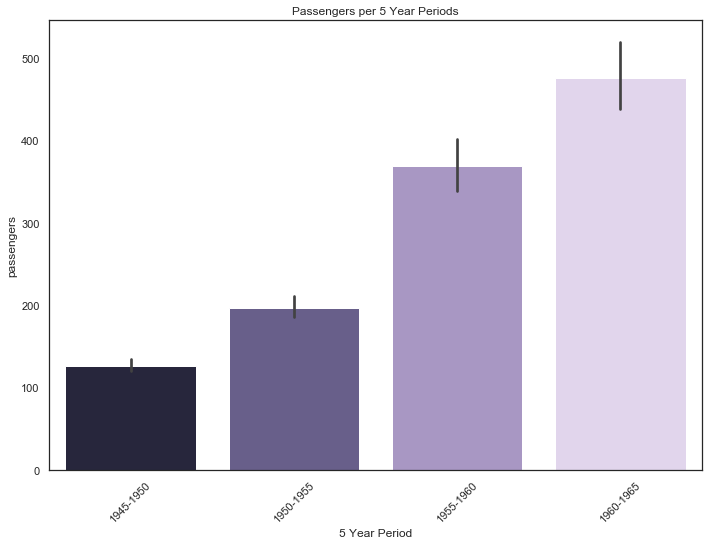